### Programming Exercise 1: Linear Regression

#### Warmup Excercise : Return the 5x5 identity matrix 

In [8]:
import numpy as np

In [9]:
def WarmUpExercise():
    return np.matrix(np.identity(5, dtype=int))  # the np.matrix is not recommended

In [10]:
A=WarmUpExercise()

In [11]:
A

matrix([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

In [12]:
# use np.eye, by default get the same identity square matrix
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [13]:
# non-squred matrix
np.eye(5,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
# move diagnal one row up
np.eye(5,5,1)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [15]:
# move diagnal one row down
np.eye(5,3,-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

###  Linear regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

#### Load Data

The file ex1data1.txt contains the dataset for our linear regression problem.
The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [16]:
data = np.loadtxt('ex1data1.txt',delimiter=',')

In [17]:
# data1 will be an 97 * 2 array
print ('data.shape=',data.shape)
X = data[:,0]
Y = data[:,1]

data.shape= (97, 2)


In [18]:
import pandas as pd

In [19]:
# pandas dataframe
data1 = pd.read_csv('ex1data1.txt', names=['Population','Profit'])

In [20]:
print ('data11.shape=',data1.shape)
X1 = data1['Population'] # or X1 = data1.iloc[:,0]
Y1 = data1['Profit'] # or Y1 = data1.iloc[:,1]

data11.shape= (97, 2)


In [21]:
# sample data
data1[0:5]

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### Plotting Data

In [22]:
# auto reload modules
%reload_ext autoreload
%autoreload 2
#!pip install --user matplotlib

In [23]:
# https://matplotlib.org/users/pyplot_tutorial.html
import matplotlib.pyplot as plt

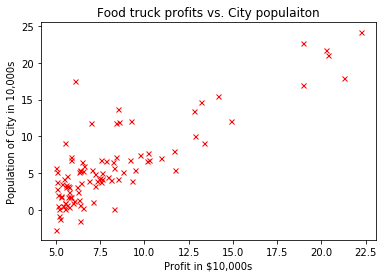

In [38]:
plt.plot(X,Y, 'rx', markersize=5) # plot data
plt.xlabel('Profit in $10,000s')  # x-axis label
plt.ylabel('Population of City in 10,000s') # y-axis label
plt.title('Food truck profits vs. City populaiton') # figure title
plt.show()

### Gradient Descent

- __Goal__: Fit the linear regression parameters $\theta$ to the above dataset using gradient descent <br><br>
- __Update Euqations__: The objective of linear regression is to minimize the cost function: $$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$
where the hypothesis $h_\theta(x)$ is given by the linear model: $$h_\theta(x)=\theta^Tx=\theta_0 + \theta_1x_1$$
- __Batch gradient descent__: in each iteration, perform the update:$$$$